# Edelman: sudden change in water level in a confined aquifer

Example from Analyical Groundwater Modeling, ch. 5, p. 72.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import ttim

from bruggeman.edelman import h_edelman

In [3]:
h_edelman

In [5]:
k = 10.0  # m/d, hydraulic conductivity
D = 10.0  # m, thickness of aquifer
S = 0.2  # -, storage coeffecient
Δh = 2.0  # m, rise in water level
t0 = 0.0  # time at which Δh is measured

In [6]:
mlconf = ttim.ModelMaq(
    kaq=k, z=[0, -D], Saq=S, tmin=1, tmax=1e2, topboundary="conf", phreatictop=True
)
hls = ttim.HeadLineSink1D(mlconf, tsandh=[(0, Δh)], layers=[0])
mlconf.solve()

self.neq  1
solution complete


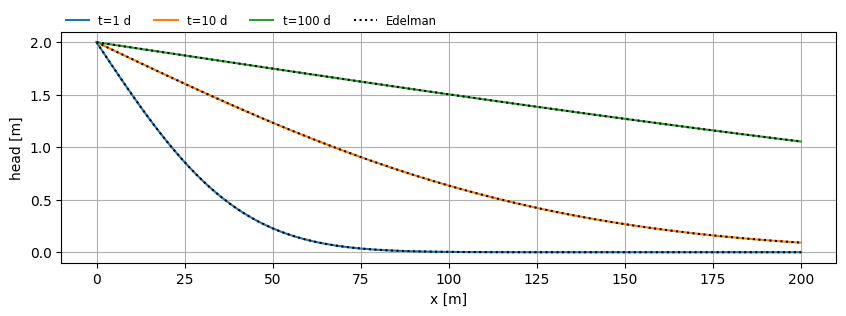

In [7]:
x = np.linspace(0, 200, 101)
y = np.zeros_like(x)
t = np.logspace(0, 2, 3)

plt.figure(figsize=(10, 3))
for i in range(len(t)):
    h = mlconf.headalongline(x, y, t[i])
    plt.plot(x, h.squeeze(), label=f"t={t[i]:.0f} d")
    ha = h_edelman(x, t[i], k * D, S, Δh, t0)
    plt.plot(x, ha, "k:")

plt.plot([], [], c="k", ls="dotted", label="Edelman")
plt.legend(loc=(0, 1), frameon=False, ncol=6, fontsize="small")
plt.xlabel("x [m]")
plt.ylabel("head [m]")
plt.grid()